In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("stuff.txt",sep='	')

In [3]:
df.head()

,Name,Completion (estimate),Abbandoned/Hiatus/Finished/Ongoing/Expected date,System Played on,Rating (out of 10) )-> Yet to review,Remarks
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Skyrim,Main Story 210%,Finished,"PS3, Switch",7.8,Nil
2,Persona 3,Main Story 50%,Abbandoned,PS3,8.0,Left: Travel for Uni
3,Persona 4 Golden,Main Story 430%,Finshed,PS Vita,8.8,Nil
4,Persona 5,Main Story 130%,Finished,PS4,8.9,Nil


In [4]:
import seaborn as sns

In [5]:
# median
df['Rating (out of 10) )-> Yet to review'].median()

8.5

In [6]:
# mean (so less coz of 2 zeroes)
df['Rating (out of 10) )-> Yet to review'].mean()

7.786111111111111

In [7]:
df.describe()

,Rating (out of 10) )-> Yet to review
count,36.000000
mean,7.786111
std,2.000308
min,0.000000
25%,7.700000
50%,8.500000
75%,8.700000
max,9.200000


In [8]:
# rating greater than 8
(df['Rating (out of 10) )-> Yet to review']>8).value_counts()

True     21
False    16
Name: Rating (out of 10) )-> Yet to review, dtype: int64

In [9]:
df['Abbandoned/Hiatus/Finished/Ongoing/Expected date'].describe()

count           36
unique           8
top       Finished
freq            27
Name: Abbandoned/Hiatus/Finished/Ongoing/Expected date, dtype: object

In [10]:
# games finished and ratings above 8
((df['Rating (out of 10) )-> Yet to review']>8)&(df['Abbandoned/Hiatus/Finished/Ongoing/Expected date']=="Finished")).value_counts()

False    20
True     17
dtype: int64

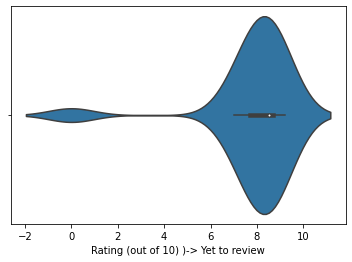

In [11]:
# violin plot of ratings
sns.violinplot(x='Rating (out of 10) )-> Yet to review',data=df)

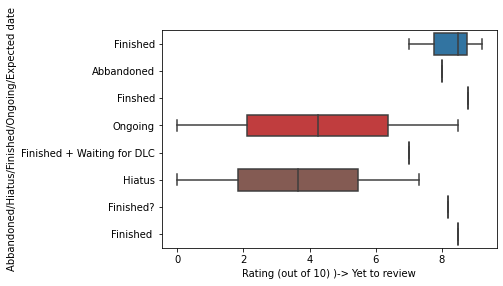

In [12]:
# ratings vs completion
sns.boxplot(x='Rating (out of 10) )-> Yet to review',y='Abbandoned/Hiatus/Finished/Ongoing/Expected date',data=df)

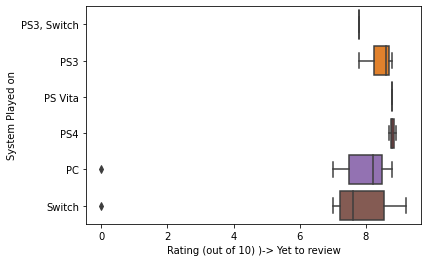

In [13]:
#ratings vs system played on 
sns.boxplot(x='Rating (out of 10) )-> Yet to review',y='System Played on',data=df)

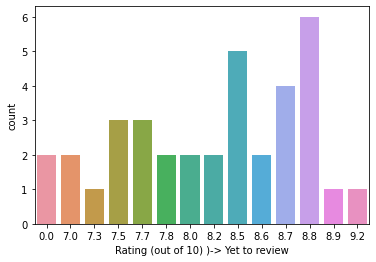

In [14]:
#ratings 
sns.countplot(x='Rating (out of 10) )-> Yet to review',data=df)

[Text(0, 0, 'Finished'),
 Text(0, 0, 'Abbandoned'),
 Text(0, 0, 'Finshed'),
 Text(0, 0, 'Ongoing'),
 Text(0, 0, 'Finished + Waiting for DLC'),
 Text(0, 0, 'Hiatus'),
 Text(0, 0, 'Finished?'),
 Text(0, 0, 'Finished ')]

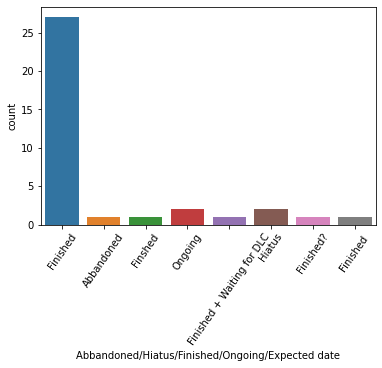

In [15]:
#ratings 
g=sns.countplot(x='Abbandoned/Hiatus/Finished/Ongoing/Expected date',data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=55)

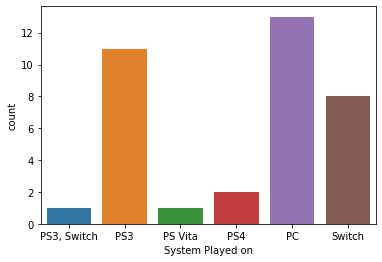

In [16]:
#ratings 
sns.countplot(x='System Played on',data=df)

In [17]:
df.fillna(df.mean())
df[(df != 0).all(1)]
df=df.iloc[1:]

In [18]:
df.head()

,Name,Completion (estimate),Abbandoned/Hiatus/Finished/Ongoing/Expected date,System Played on,Rating (out of 10) )-> Yet to review,Remarks
1,Skyrim,Main Story 210%,Finished,"PS3, Switch",7.8,Nil
2,Persona 3,Main Story 50%,Abbandoned,PS3,8.0,Left: Travel for Uni
3,Persona 4 Golden,Main Story 430%,Finshed,PS Vita,8.8,Nil
4,Persona 5,Main Story 130%,Finished,PS4,8.9,Nil
5,The Witcher 3,Main Story 100% + DLCs 100%,Finished,PC,8.8,Nil


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [20]:
import numpy as np

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [22]:
train_df=df

In [23]:
categ_feat_idx = np.where(train_df.drop('Rating (out of 10) )-> Yet to review', axis=1).dtypes == 'object')[0]
categ_feat_idx

array([0, 1, 2, 3, 4], dtype=int64)

In [24]:
X_train = train_df.drop('Rating (out of 10) )-> Yet to review', axis=1).values
y_train = train_df['Rating (out of 10) )-> Yet to review']

In [25]:
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, 
                                                                test_size=0.3, 
                                                                random_state=17)

In [32]:
from catboost import CatBoostRegressor

In [33]:
ctb = CatBoostRegressor(random_seed=17, silent=True)

In [34]:
%%time
ctb.fit(X_train_part, y_train_part,
        cat_features=categ_feat_idx);

Wall time: 2.96 s


In [36]:
ctb.score(X_train_part, y_train_part)

0.23260399366534024